<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Concentrix_ML_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

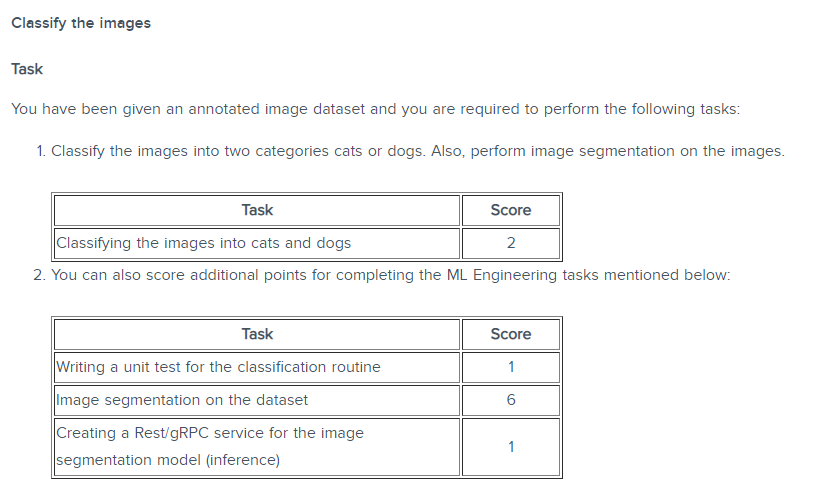

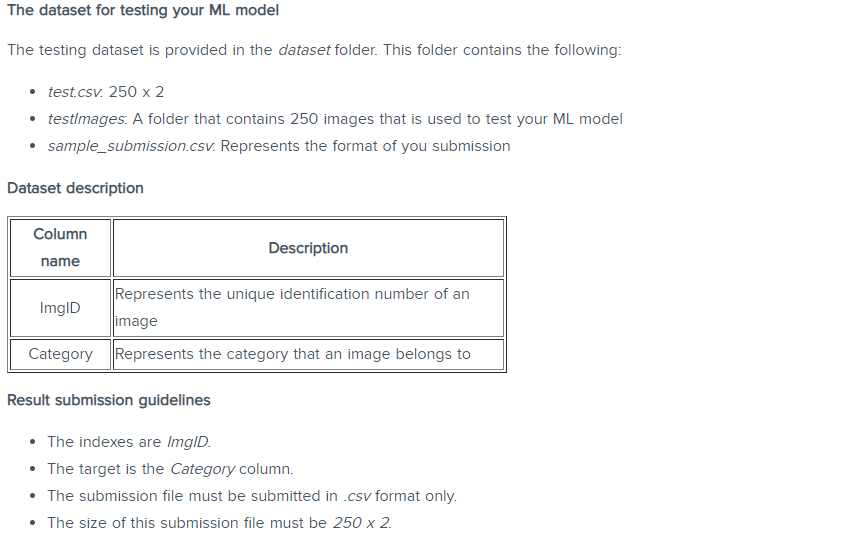

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving images.tar.gz to images.tar (1).gz


In [ ]:
%%capture
!pip install ipyplot

In [ ]:
!tar -xzvf "/content/annotations.tar.gz" -C "/content/drive/MyDrive/Machine_Hack/Concentrix" #[run this cell to extract tar.gz files]

Streaming output truncated to the last 5000 lines.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian

In [ ]:
!unzip "/content/1b394254f35711eb.zip" -d "/content/drive/MyDrive/Machine_Hack/Concentrix"

Archive:  /content/1b394254f35711eb.zip
   creating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/
   creating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/21.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/146.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/23.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/227.jpeg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/22.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/24.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/3.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/7.jpg  
  inflating: /content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/1.jpg  
  inflating: /conte

## Import require Libraries for Data Processing

In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score, accuracy_score
import cv2
import ipyplot
from PIL  import Image
import seaborn as sns
import matplotlib.pyplot as plt


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


In [ ]:
images = []
labels = []
root = "/content/drive/MyDrive/CATS_DOGS"
train_path = os.path.join(root,'train')
test_path = os.path.join(root,'test')
for folder in os.listdir(train_path):
  for image in os.listdir(os.path.join(train_path,folder)):
    images.append(os.path.join(train_path,folder,image))
    labels.append(folder)

In [ ]:
for folder in os.listdir(test_path):
  for image in os.listdir(os.path.join(test_path,folder)):
    images.append(os.path.join(train_path,folder,image))
    labels.append(folder)

In [ ]:
len(images),len(labels)

(24994, 24994)

In [ ]:
train = pd.DataFrame({'ImgID':images,'Label':labels})

In [ ]:
train.head()

,ImgID,Label
0,/content/drive/MyDrive/CATS_DOGS/train/CAT/842...,CAT
1,/content/drive/MyDrive/CATS_DOGS/train/CAT/845...,CAT
2,/content/drive/MyDrive/CATS_DOGS/train/CAT/842...,CAT
3,/content/drive/MyDrive/CATS_DOGS/train/CAT/842...,CAT
4,/content/drive/MyDrive/CATS_DOGS/train/CAT/839...,CAT


## Shuffle dataframe

In [ ]:
train = train.sample(frac = 1)

In [ ]:
train.head()

,ImgID,Label
24407,/content/drive/MyDrive/CATS_DOGS/train/DOG/107...,DOG
1837,/content/drive/MyDrive/CATS_DOGS/train/CAT/850...,CAT
16816,/content/drive/MyDrive/CATS_DOGS/train/DOG/267...,DOG
7978,/content/drive/MyDrive/CATS_DOGS/train/CAT/311...,CAT
18560,/content/drive/MyDrive/CATS_DOGS/train/DOG/115...,DOG


In [ ]:
train.to_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/train.csv",index=False)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/sample_submission.csv")

In [ ]:
train.head()

,ImgID,Label
0,/content/drive/MyDrive/CATS_DOGS/train/DOG/107...,DOG
1,/content/drive/MyDrive/CATS_DOGS/train/CAT/850...,CAT
2,/content/drive/MyDrive/CATS_DOGS/train/DOG/267...,DOG
3,/content/drive/MyDrive/CATS_DOGS/train/CAT/311...,CAT
4,/content/drive/MyDrive/CATS_DOGS/train/DOG/115...,DOG


In [ ]:
test.head()

,ImgID
0,1
1,2
2,3
3,4
4,5


In [ ]:
test['ImgID'] = test['ImgID'].astype('str') + ".jpg"
test.head()

,ImgID
0,1.jpg
1,2.jpg
2,3.jpg
3,4.jpg
4,5.jpg


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Machine_Hack/Concentrix/dataset/testImages/10.jpg")

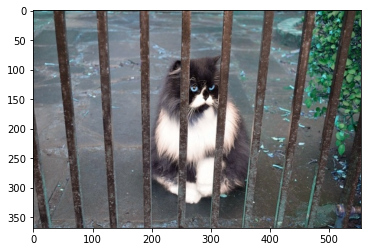

In [ ]:
plt.imshow(img)

## Applying Transfer Learning using Keras

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed, Activation, MaxPool2D
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import *
#
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
#
import os
import shutil
import cv2
import glob
from tqdm.notebook import tqdm
from tqdm import tqdm
from PIL import Image
#
import gc
#
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train = train.drop_duplicates('ImgID')

In [ ]:
train.shape

(24994, 2)

In [ ]:
import random
random.randint(1,100)
## 
train_formated = train.copy()
##
image_samples = train_formated['ImgID'].values.tolist()
image_labels = train_formated['Label'].values.tolist()
#
image_array = []
image_label_array = []
for i in range(16):
  index = random.randint(1,100)
  img = Image.open(image_samples[index])
  image_array.append(img)
  image_label_array.append(image_labels[index])

FileNotFoundError: ignored


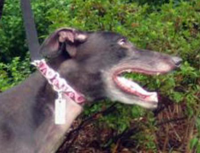
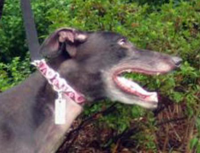
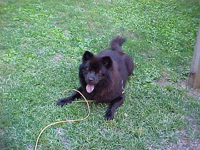
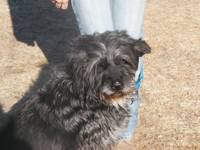
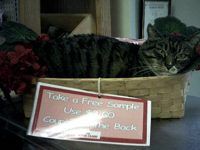
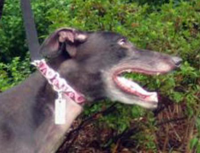
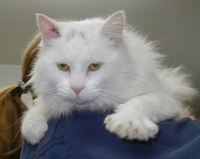
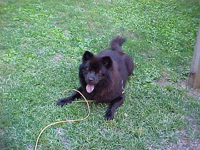
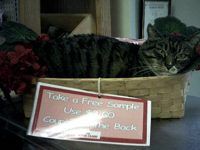
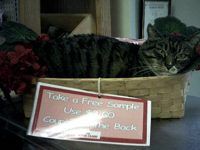
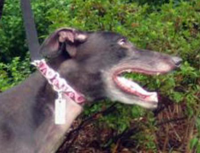
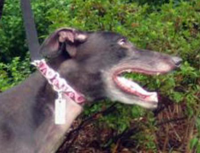
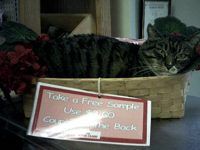
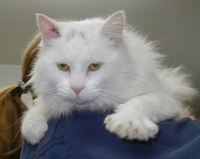
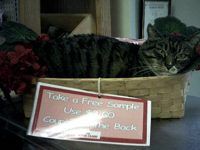
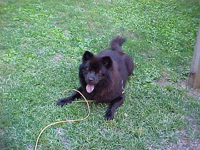


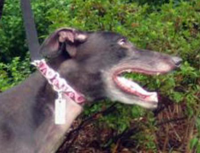
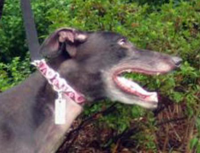
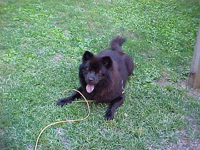
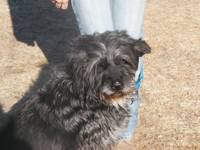
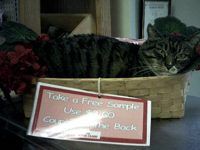
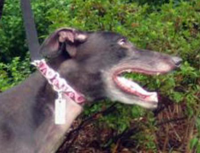
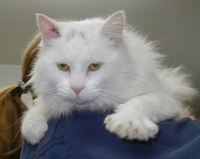
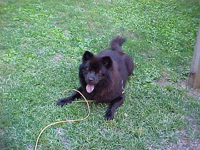
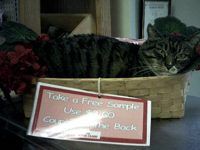
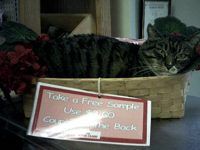
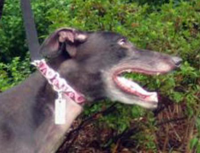
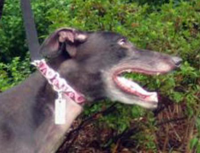
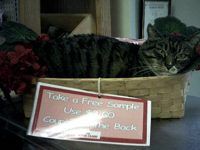
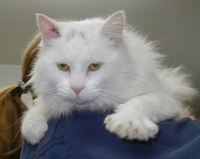
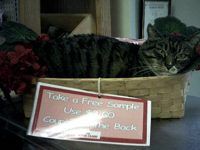
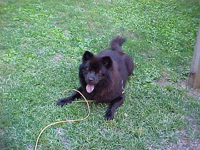

In [ ]:
ipyplot.plot_images(image_array,image_label_array,img_width=200)